In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

## 1A.1

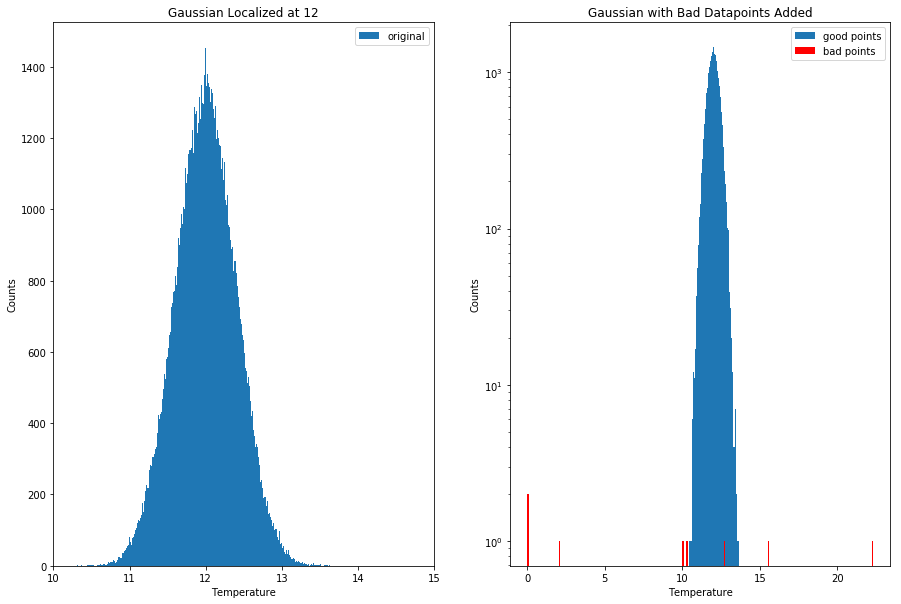

In [2]:
gbp0 = stats.norm.rvs(loc = 12, scale = 0.4, size=100000)
add = np.array([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
gbp = np.concatenate((gbp0,add),axis=0)

fig, ax = plt.subplots(1,2, figsize=(15,10))


ax[0].hist(gbp0,bins=250, label="original")
ax[0].set_xlim(10,15)
ax[0].set_title('Gaussian Localized at 12')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('Counts')
ax[0].legend()

ax[1].hist(gbp0,bins=250, label='good points')
ax[1].hist(add,bins=250,color='red', label='bad points')
ax[1].set_yscale('log')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('Counts')
ax[1].set_title('Gaussian with Bad Datapoints Added')
ax[1].legend()



plt.show()

## 1A.2 - 3
We seek to elimanate the **bad** data points, as such we will need a threshold of what we consider **good** data points. Given a point $x$, what is the probability of measureing a value as or more extreme as that $x$, assuming background distribution is true? Assuming a normal distribution, the probability can be found by integrating from $x$ to $\infty$. We will be using `norm.cdf()` which integrates from -$\infty$ to $x$, and using that the normal distribution itself is normalized, we can simply subtract our `norm.cdf` from 1. Now armed with the probability, we can calculate the asscociated sigma by using `norm.ppf()` on the `1 - norm.cdf` value.

Since our data is normally distributed we know that any high sigma event will look less data-like. We then want to pick a threshold where we can eliminated the maximum amount of bad data while keeping as much of the original data as possible. We can keep much our data with a cut off of $3 \sigma$ which will retain 99.7% of our original data. A question we may want to ask is when we make our cut of -$3 \sigma$ to $3 \sigma$, how much of the bad points will be successfully excluded. 

10.0  is removed.
10.3  is removed.
2.1  is removed.
0.0  is removed.
0.0  is removed.
15.6  is removed.
22.3  is removed.
12.7  is kept.


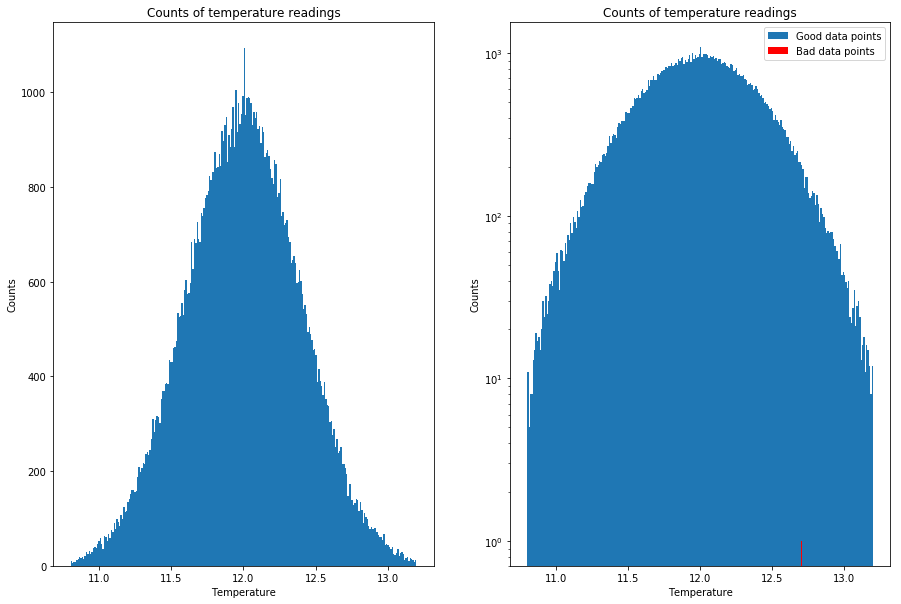

In [3]:
plus_3_sigma = stats.norm.ppf(stats.norm.cdf(3), loc=12., scale=0.4)
minus_3_sigma = stats.norm.ppf(stats.norm.cdf(-3), loc=12., scale=0.4)

kept = []
for i in add:
    if i < plus_3_sigma and i > minus_3_sigma:
        kept.append(i)
        print(i, ' is kept.')
    else:
        print(i, ' is removed.')
        
idx = np.where((gbp0 > minus_3_sigma) & (gbp0 < plus_3_sigma))
               
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].hist(gbp0[idx], bins = 250)
ax[1].hist(gbp0[idx], bins = 250, label="Good data points")
ax[1].hist(kept, bins = 250, color='r', label='Bad data points')
ax[1].set_yscale('log')

ax[0].set_xlabel('Temperature')
ax[1].set_xlabel('Temperature')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].set_title("Counts of temperature readings")
ax[1].set_title("Counts of temperature readings")

ax[1].legend()

plt.show()

Now we identify how many points were correctly/incorrectly included/excluded.

In [4]:
points = 0
for i in gbp0:
    if i > minus_3_sigma and i < plus_3_sigma:
        points += 1

print(points, " good data points were correctly kept by our cut.")
print(100000 - points, " good data points were incorrectly excluded by our cut.")
print(len(add) - len(kept), ' bad data points were correctly excluded by our cut.')
print(len(kept), ' bad data points were incorrectly included by our cut.')

99750  good data points were correctly kept by our cut.
250  good data points were incorrectly excluded by our cut.
7  bad data points were correctly excluded by our cut.
1  bad data points were incorrectly included by our cut.


## 1B

The number of good point omissions depends on the $\sigma$ threshold chosen. It is a predictable quantity because the sigma answers the question on the likelihood of finding a point or something more extreme than that point. In practice, decreasing our sigma thereshold would lead to more good data being thrown out, and an extremely large sigma would keep all our data but also all the bad points.

## 1C
There are mistakes in letting bad data in, although is just one point. They are avoidable, if we chose a smaller sigma we could've eliminated that one point as well. But this comes at a cost of ommittng a good amount of good data points. It should also be noted that having just one erroneous point in an area where our distribution is heavily populated is not likely to change the large scale statistics of the distribution. 

## 2